### **Final Project: Modeling US Opioid Overdose Deaths**

##### This project aims to aggregate and analyze overdose death rate data by state from 2020-2023 from NCHS8 along with CDC’s publicly available State Unintentional Drug Overdose Reporting System (SUDORS), with demographic data from US Census Estimate of Total Population for whom poverty status is determined


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
file_path1 = 'Demographic_Data 2020-2024.xlsx'
file_path2 = 'DECENNIALCDP1.csv'
file_path3 = 'SUDORS-Fatal-Overdose-Data.xlsx'
file_path4 = 'State Naloxone Dispensing Rates.csv'
file_path5 = 'US_Unemployment_SeriesReport-202509.xlsx'

demographics_df = pd.read_excel(file_path1, header=0, skiprows=[0])
census_df = pd.read_csv(file_path2, header=0, skiprows=[0])
overdose_df = pd.read_excel(file_path3, sheet_name= 'Data')
naloxone_df = pd.read_csv(file_path4)
unemployment_df = pd.read_excel(file_path5, header=0, skiprows=11)



### 1. Exploratory Data Analysis

#####    After loading our libraries and uploading the different datasets we began by comparing the demographic data from the US Census Estimate of Total Population for whom poverty status is determined for 2020, with the actual US census data from 2020. By comparing these population totals we see that out dataset is ~ 96% of total population so feel confident that it is representative of the population means.

In [47]:
pop_percent_val = demographics_df[demographics_df['Year'] == 2020]
pop_percent_val = pop_percent_val[['Year', 'Geographic Area Name', 'Estimate!!Total!!Population for whom poverty status is determined']]

In [48]:
pop_percent_val = pd.merge(
    left=pop_percent_val, 
    right=census_df,
    how='left',
    left_on=['Geographic Area Name'],
    right_on=['Geographic Area '],
)
pop_percent_val.head()

,Year,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Geography,Geographic Area,Total
0,2020,Alabama,4771614,0400000US01,Alabama,5024279
1,2020,Alaska,719445,0400000US02,Alaska,733391
2,2020,Arizona,7012999,0400000US04,Arizona,7151502
3,2020,Arkansas,2923585,0400000US05,Arkansas,3011524
4,2020,California,38589882,0400000US06,California,39538223


In [49]:
pop_percent_val['Result'] = pop_percent_val['Estimate!!Total!!Population for whom poverty status is determined']/pop_percent_val[' Total'] * 100
total_pop_percentage = ((pop_percent_val['Estimate!!Total!!Population for whom poverty status is determined'].sum()) / (pop_percent_val[' Total'].sum())) * 100
min_pop_percentage = pop_percent_val['Result'].min()

print(f"This dataset respresents ~{total_pop_percentage:.2f}% of the toal US population with a single state minimum of {min_pop_percentage:.2f}%")


This dataset respresents ~96.13% of the toal US population with a single state minimum of 92.68%


#####    We then subsetted the demographic and overdose datasets the variables that we were interested in exploring and modeling. We then merged these new subsets to create our Merged dataframe that we will be analysing.

In [50]:
demosubset_df = demographics_df[['Year', 'Geographic Area Name', 'Precent_Male', 'Precent_Female', 'Precent_White', 'Precent_Black', 'Precent_Indigenous', 'Precent_Asian', 'Precent_Polynesian', 'Precent_Latino',
                                  'Precent_Mixed', 'Precent_Other', 'Precent_25+', 'Precent_25+_Not_HS_Grad', 'Precent_HS_Grad', 'Precent_Some College', 'Precent_College_Grad', 'Precent_Labor force (16+)', 'Precent_Employed',
                                   'Precent_Employed Male', 'Precent_Employed Female', 'Precent_Unemployed', 'Precent_Male Unemployed', 'Precent_Female Unemployed', 'Precent_Below_125%_Poverty_Level']]

In [51]:
od_rate_df = overdose_df[['Jurisdiction', 'year', 'alldrug_rate', 'opioids_rate', 'imfs_rate', 'heroin_rate', 'rxopioids_rate',
                          'nonopioid_sedatives_rate', 'opioids_percent', 'imfs_percent', 'heroin_percent', 'rxopioids_percent']]

In [52]:
merged_df = pd.merge(
    left=demosubset_df, 
    right=od_rate_df,
    how='left',
    left_on=['Geographic Area Name', 'Year'],
    right_on=['Jurisdiction', 'year'],
)

In [53]:
merged_df = merged_df.drop(["Jurisdiction", "year"], axis=1, inplace=False)  
merged_df.head()

,Year,Geographic Area Name,Precent_Male,Precent_Female,Precent_White,Precent_Black,Precent_Indigenous,Precent_Asian,Precent_Polynesian,Precent_Latino,...,alldrug_rate,opioids_rate,imfs_rate,heroin_rate,rxopioids_rate,nonopioid_sedatives_rate,opioids_percent,imfs_percent,heroin_percent,rxopioids_percent
0,2023,Alabama,48.239683,51.760317,63.611115,25.086402,0.492255,1.545847,0.044367,5.753281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Alaska,52.000758,47.999242,57.770566,2.701090,13.392667,5.944489,1.556386,7.410258,...,48.3,40.3,37.6,4.0,6.1,6.2,83.5,77.8,8.5,12.5
2,2023,Arizona,49.616593,50.383407,52.360509,4.694761,3.916180,3.652080,0.186648,31.653370,...,40.7,28.9,26.7,0.8,3.3,3.9,70.8,65.2,2.1,8.3
3,2023,Arkansas,49.068837,50.931163,67.282823,14.104681,0.569663,1.679060,0.395255,9.191647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,California,49.736403,50.263597,33.276067,5.279560,1.403415,15.800192,0.378850,40.542050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
merged_df.to_csv('merged_df.csv', index=False)  

##### We then ran the df.describe() function to explore our dataset and get some information before being the visualization and modeling portion of the project. This includes seeing how many rows there are as well as the descriptive statistics for the numeric variables. We also created a correlation matrix which gave us several valuable insights into the how the variables relate to each other.

In [55]:
merged_df.describe()

,Year,Precent_Male,Precent_Female,Precent_White,Precent_Black,Precent_Indigenous,Precent_Asian,Precent_Polynesian,Precent_Latino,Precent_Mixed,...,alldrug_rate,opioids_rate,imfs_rate,heroin_rate,rxopioids_rate,nonopioid_sedatives_rate,opioids_percent,imfs_percent,heroin_percent,rxopioids_percent
count,260.000000,260.000000,260.000000,260.000000,253.000000,231.000000,253.000000,260.000000,260.000000,260.000000,...,140.000000,140.000000,139.000000,120.000000,138.000000,135.000000,140.000000,140.000000,140.000000,140.00000
mean,2021.000000,49.300191,50.699809,65.018283,11.059150,1.702005,4.419768,0.351980,14.263588,8.367723,...,34.982857,28.231429,25.191367,4.067500,5.461594,7.224444,77.300714,66.224286,10.664286,15.81000
std,1.416941,0.888315,0.888315,18.299840,10.111722,2.827928,5.514452,1.432926,15.677249,6.351371,...,17.148996,15.651290,15.441275,3.300399,3.281541,5.435764,13.351827,18.571963,8.269464,5.98585
min,2019.000000,47.175860,47.845706,0.456557,0.533628,0.158063,0.176460,0.005193,1.452057,1.491291,...,6.900000,3.900000,2.500000,0.500000,1.100000,1.600000,30.600000,16.600000,0.500000,5.30000
25%,2020.000000,48.753237,50.104181,55.250661,3.474806,0.344652,1.701080,0.038316,5.544727,3.866400,...,23.775000,17.150000,12.900000,1.700000,3.025000,3.650000,70.700000,54.375000,4.000000,11.70000
50%,2021.000000,49.232471,50.767529,67.525128,7.434095,0.601867,2.930420,0.062829,10.247227,6.881103,...,33.400000,26.800000,24.600000,3.200000,5.100000,5.600000,81.050000,74.100000,8.100000,15.40000
75%,2022.000000,49.895819,51.246763,78.557978,14.663569,1.209827,4.994184,0.144325,16.010519,10.066269,...,41.925000,36.225000,33.400000,5.175000,7.175000,8.900000,87.450000,80.025000,14.875000,19.05000
max,2023.000000,52.154294,52.824140,93.116555,46.124233,15.809591,39.198145,10.419425,99.254815,38.551230,...,100.300000,79.000000,77.300000,18.000000,21.500000,29.600000,93.500000,89.500000,38.600000,41.10000


In [56]:
numerical_cols = merged_df.select_dtypes(include=['number']).columns
numerical_df = merged_df[numerical_cols]


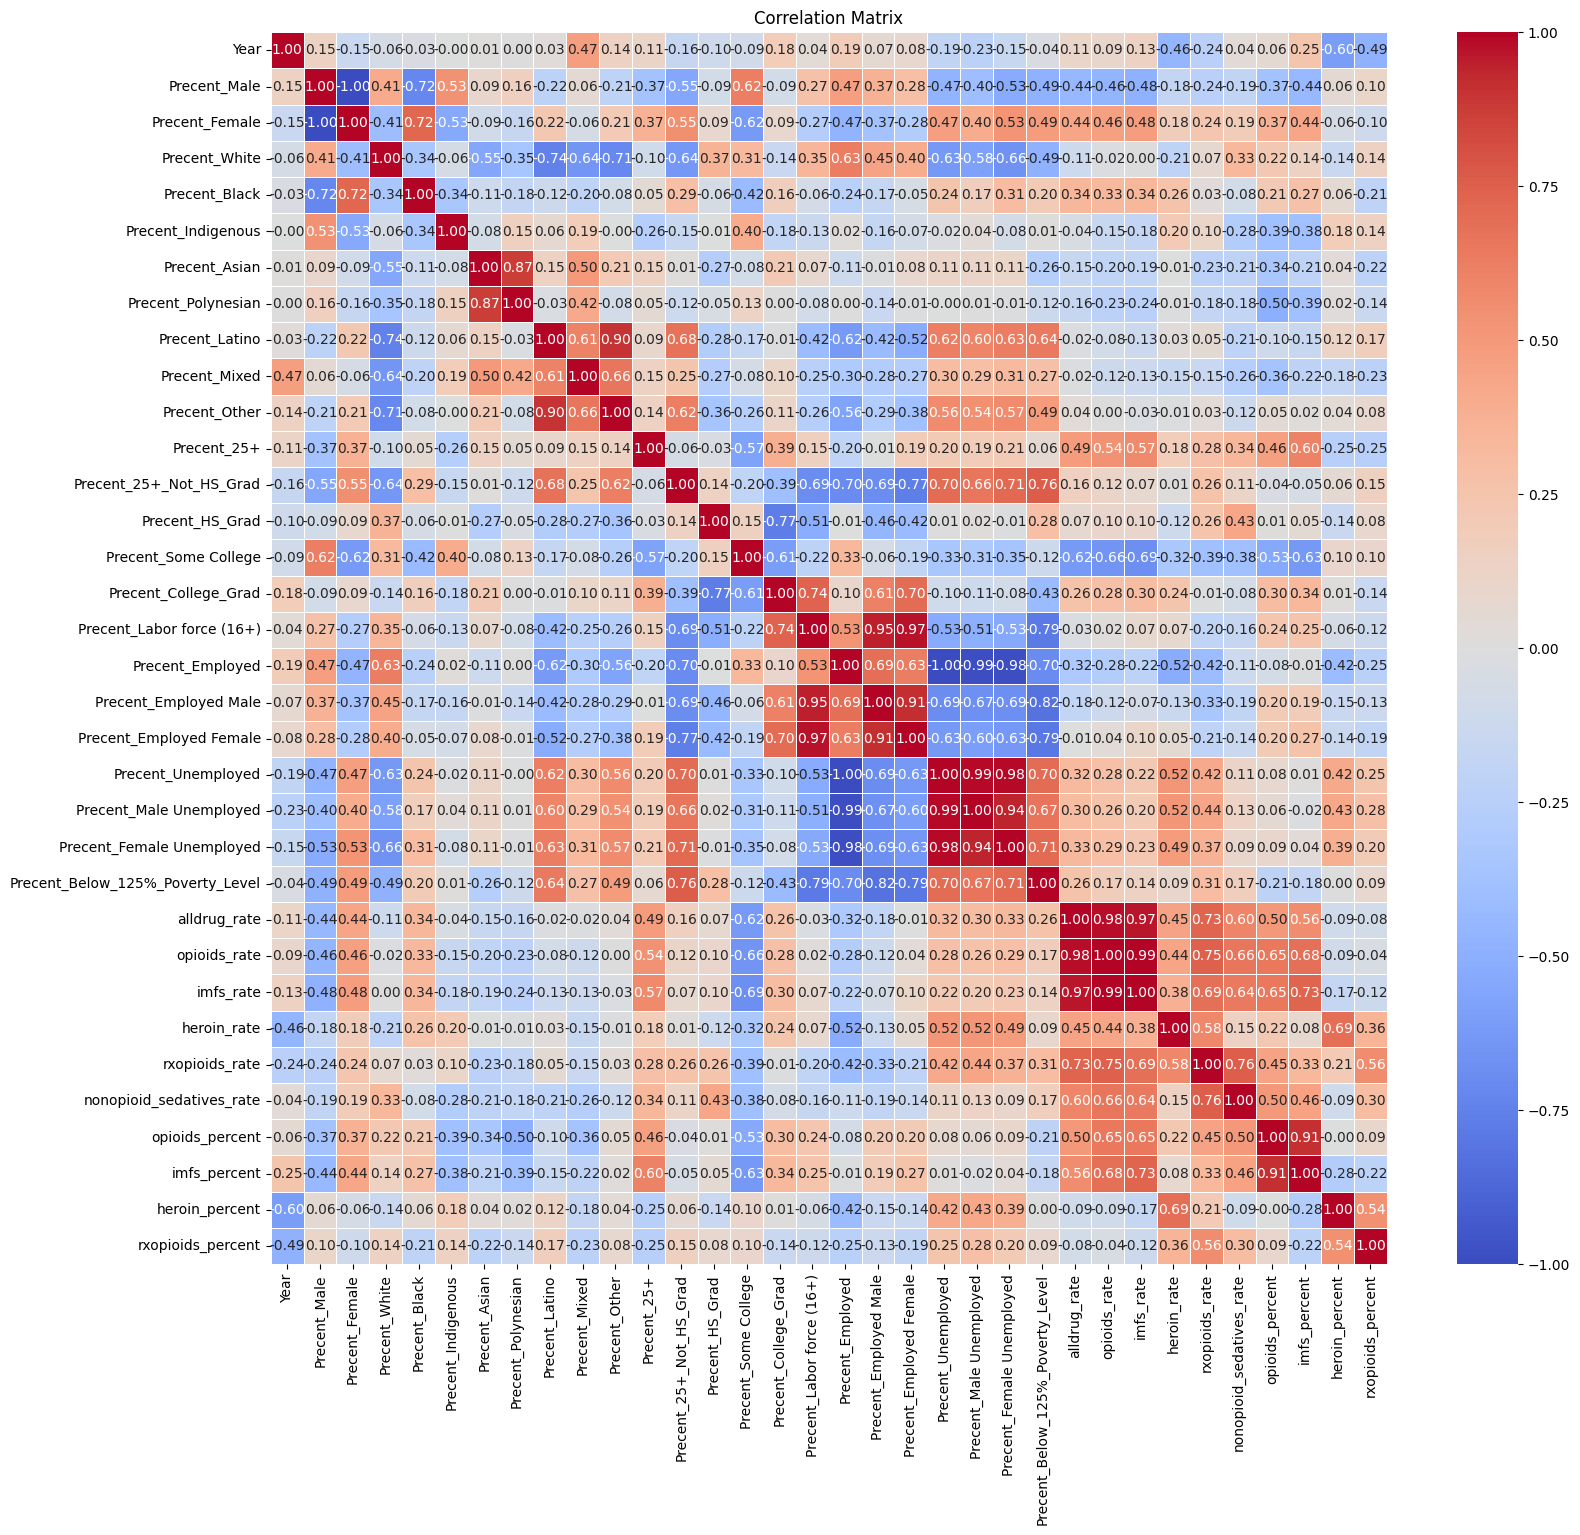

In [57]:
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(18, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 
plt.title('Correlation Matrix') 
plt.show()

### 2. Data Visualization

##### After completing some more data cleaning steps, including removing rows for states that did not have available drug death rate for a particular year, we created visualizations for some factors that appeared to be correlated.

In [58]:
print(f"\nMissing Values:\n{merged_df.isnull().sum().sort_values(ascending=False)}")
df_cleaned = merged_df.dropna(subset=['alldrug_rate'])
df_cleaned.head()


Missing Values:
heroin_rate                         140
nonopioid_sedatives_rate            125
rxopioids_rate                      122
imfs_rate                           121
rxopioids_percent                   120
opioids_rate                        120
heroin_percent                      120
opioids_percent                     120
imfs_percent                        120
alldrug_rate                        120
Precent_Indigenous                   29
Precent_Asian                         7
Precent_Other                         7
Precent_Black                         7
Year                                  0
Precent_Male                          0
Geographic Area Name                  0
Precent_Female                        0
Precent_Polynesian                    0
Precent_Employed                      0
Precent_Labor force (16+)             0
Precent_College_Grad                  0
Precent_Some College                  0
Precent_HS_Grad                       0
Precent_25+_Not_HS_Grad

,Year,Geographic Area Name,Precent_Male,Precent_Female,Precent_White,Precent_Black,Precent_Indigenous,Precent_Asian,Precent_Polynesian,Precent_Latino,...,alldrug_rate,opioids_rate,imfs_rate,heroin_rate,rxopioids_rate,nonopioid_sedatives_rate,opioids_percent,imfs_percent,heroin_percent,rxopioids_percent
1,2023,Alaska,52.000758,47.999242,57.770566,2.701090,13.392667,5.944489,1.556386,7.410258,...,48.3,40.3,37.6,4.0,6.1,6.2,83.5,77.8,8.5,12.5
2,2023,Arizona,49.616593,50.383407,52.360509,4.694761,3.916180,3.652080,0.186648,31.653370,...,40.7,28.9,26.7,0.8,3.3,3.9,70.8,65.2,2.1,8.3
5,2023,Colorado,50.498288,49.501712,64.631793,3.795825,1.185368,3.324912,0.144517,22.703789,...,28.8,22.0,19.3,0.9,3.9,4.6,76.9,67.7,3.0,13.4
6,2023,Connecticut,49.069181,50.930819,61.390530,10.656789,0.345178,4.852593,0.050114,18.747870,...,36.8,33.6,31.3,2.8,7.2,15.3,91.1,84.5,8.0,20.1
7,2023,Delaware,48.313741,51.686259,58.222660,22.196635,NaN,4.350848,0.039820,11.182775,...,53.8,48.7,46.4,3.2,5.9,3.9,90.0,85.7,6.2,11.1


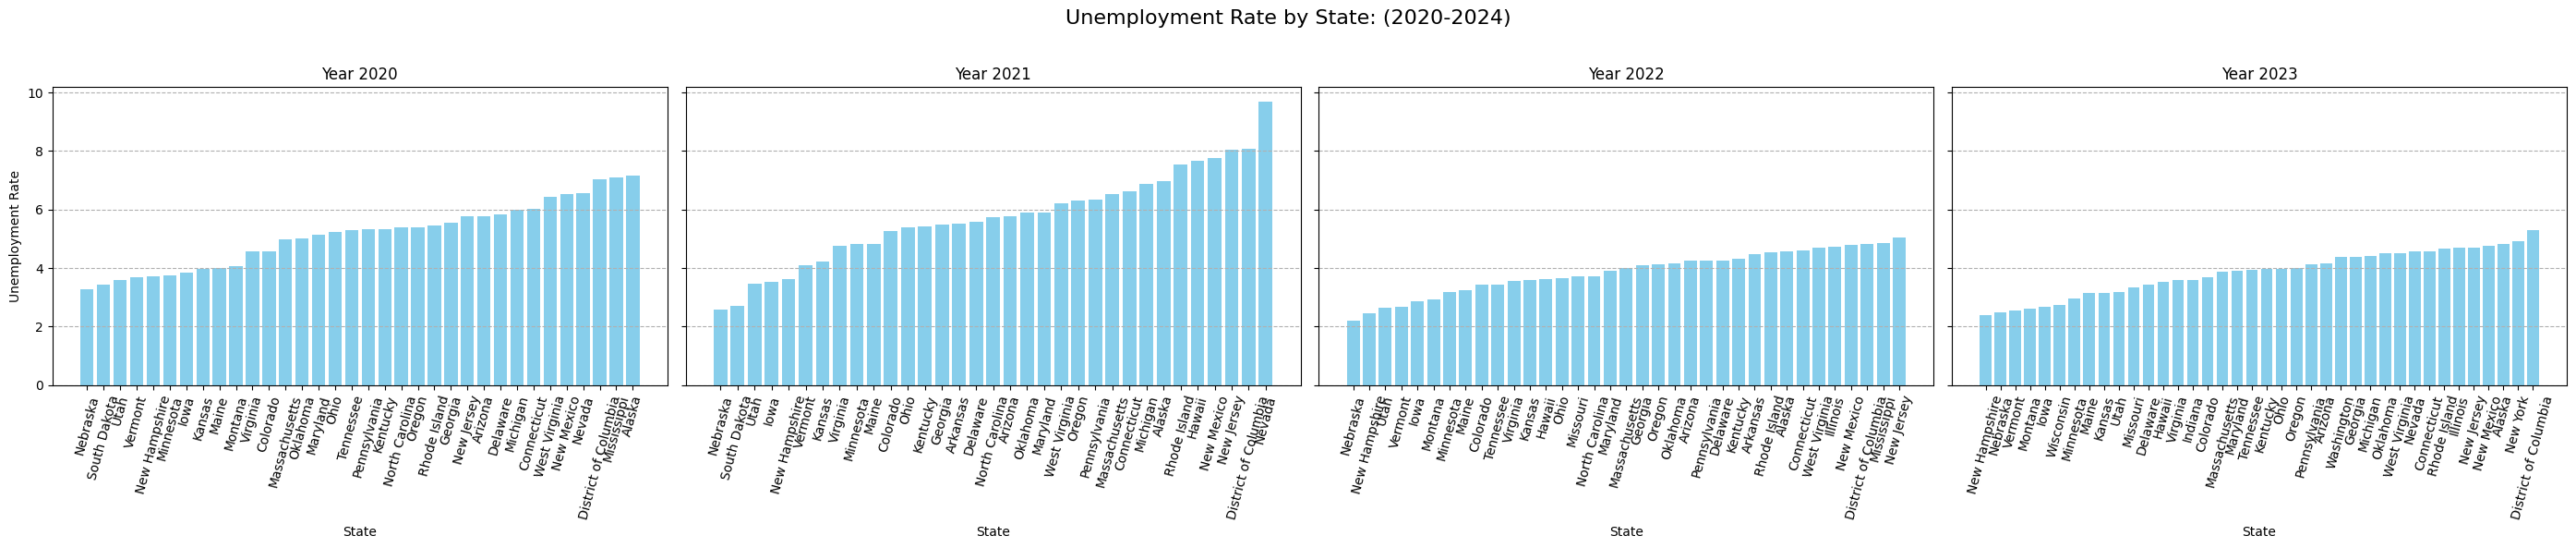

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(28, 6), sharey=True)
fig.suptitle('Unemployment Rate by State: (2020-2024)', fontsize=16)

years = sorted(df_cleaned['Year'].unique())

for i, year in enumerate(years):
    data_for_year = df_cleaned[df_cleaned['Year'] == year].sort_values('Precent_Unemployed')
    ax = axes[i]
    
    ax.bar(data_for_year['Geographic Area Name'], data_for_year['Precent_Unemployed'], color='skyblue')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('State')
    ax.tick_params(axis='x', rotation=75)
    ax.grid(axis='y', linestyle='--')

axes[0].set_ylabel('Unemployment Rate')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


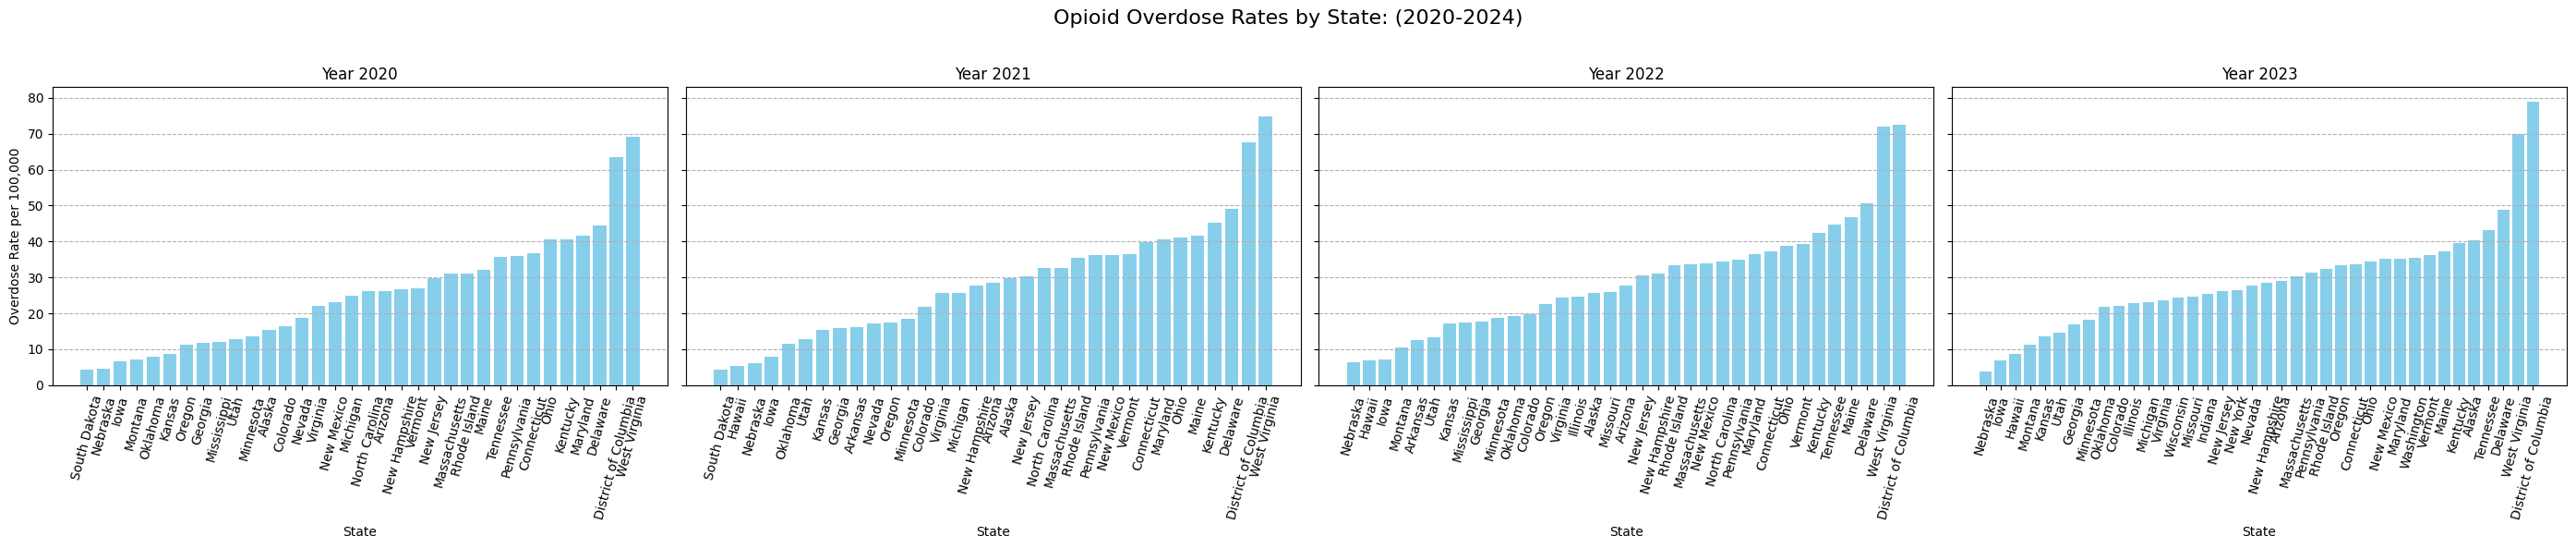

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(28, 6), sharey=True)
fig.suptitle('Opioid Overdose Rates by State: (2020-2024)', fontsize=16)

years = sorted(df_cleaned['Year'].unique())

for i, year in enumerate(years):
    data_for_year = df_cleaned[df_cleaned['Year'] == year].sort_values('opioids_rate')
    ax = axes[i]
    
    ax.bar(data_for_year['Geographic Area Name'], data_for_year['opioids_rate'], color='skyblue')
    ax.set_title(f'Year {year}')
    ax.set_xlabel('State')
    ax.tick_params(axis='x', rotation=75)
    ax.grid(axis='y', linestyle='--')

axes[0].set_ylabel('Overdose Rate per 100,000')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### We also created visualizations for the total monthly overdose deaths to explore any potential seasonality.

In [61]:
od_month_df = overdose_df[['Jurisdiction', 'year', 'alldrug_rate', 'opioids_rate', 'jan_deaths', 'feb_deaths', 'mar_deaths','apr_deaths', 
                          'may_deaths', 'jun_deaths', 'jul_deaths', 'aug_deaths', 'sep_deaths', 'oct_deaths', 'nov_deaths', 'dec_deaths']]
od_month_df.head()

,Jurisdiction,year,alldrug_rate,opioids_rate,jan_deaths,feb_deaths,mar_deaths,apr_deaths,may_deaths,jun_deaths,jul_deaths,aug_deaths,sep_deaths,oct_deaths,nov_deaths,dec_deaths
0,Alaska,2020,23.8,15.4,12,10,8,14,19,18,16,13,15,11,18,17
1,Arizona,2020,34.0,26.3,172,153,183,166,218,268,316,281,182,182,171,120
2,Colorado,2020,22.4,16.3,94,83,109,127,141,97,123,143,109,91,107,105
3,Connecticut,2020,39.4,36.7,106,91,106,133,121,121,137,98,124,102,111,124
4,Delaware,2020,47.4,44.5,36,41,35,41,55,45,40,41,35,27,23,27


In [62]:
df = od_month_df.copy()
columns_to_sum = ['jan_deaths', 'feb_deaths', 'mar_deaths','apr_deaths', 'may_deaths', 'jun_deaths', 'jul_deaths', 'aug_deaths', 'sep_deaths', 'oct_deaths', 'nov_deaths', 'dec_deaths']

df_summed = df.groupby(['year'])[columns_to_sum].sum()
df_summed = df_summed.reset_index()
df_summed = pd.melt(df_summed, id_vars=['year'], value_vars=columns_to_sum)
df_summed.head()

,year,variable,value
0,2020,jan_deaths,6702
1,2021,jan_deaths,8498
2,2022,jan_deaths,9688
3,2023,jan_deaths,11970
4,2020,feb_deaths,6606


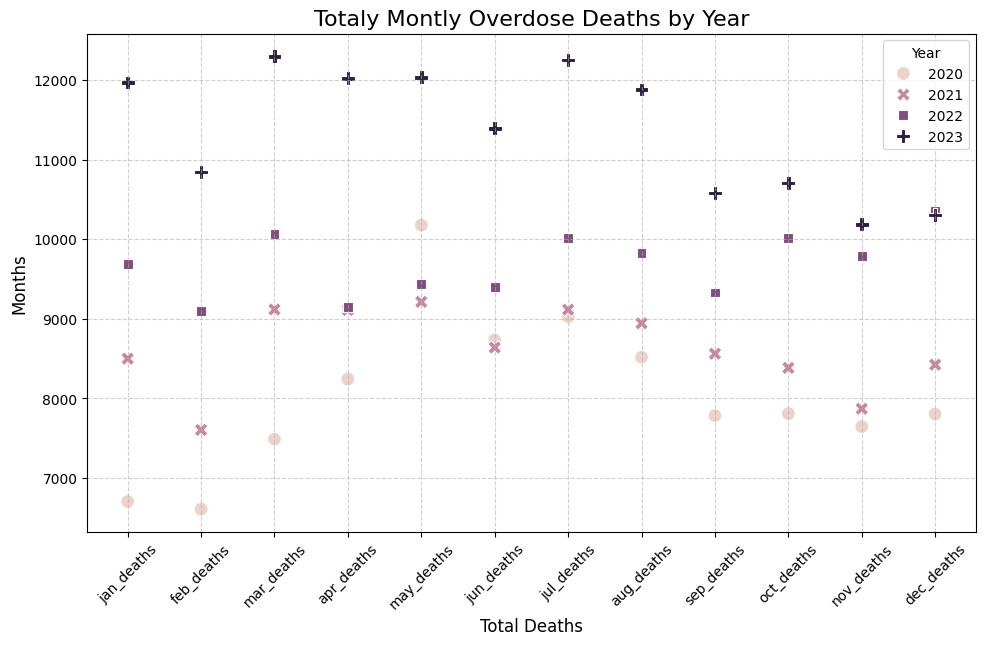

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_summed,
    x='variable',
    y='value',
    hue='year',
    style='year', 
    s=100         
)
plt.title('Totaly Montly Overdose Deaths by Year', fontsize=16)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('Months', fontsize=12)

plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [64]:
unemployment_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
1,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
2,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
3,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
4,2019,4.0,3.8,3.8,3.7,3.6,3.6,3.7,3.6,3.5,3.6,3.6,3.6


In [65]:
long_unemployment = unemployment_df.melt(
    id_vars='Year',
    var_name='Month',
    value_name='Unemployment Rate'
)
long_unemployment.tail()


,Year,Month,Unemployment Rate
127,2021,Dec,3.9
128,2022,Dec,3.5
129,2023,Dec,3.8
130,2024,Dec,4.1
131,2025,Dec,NaN


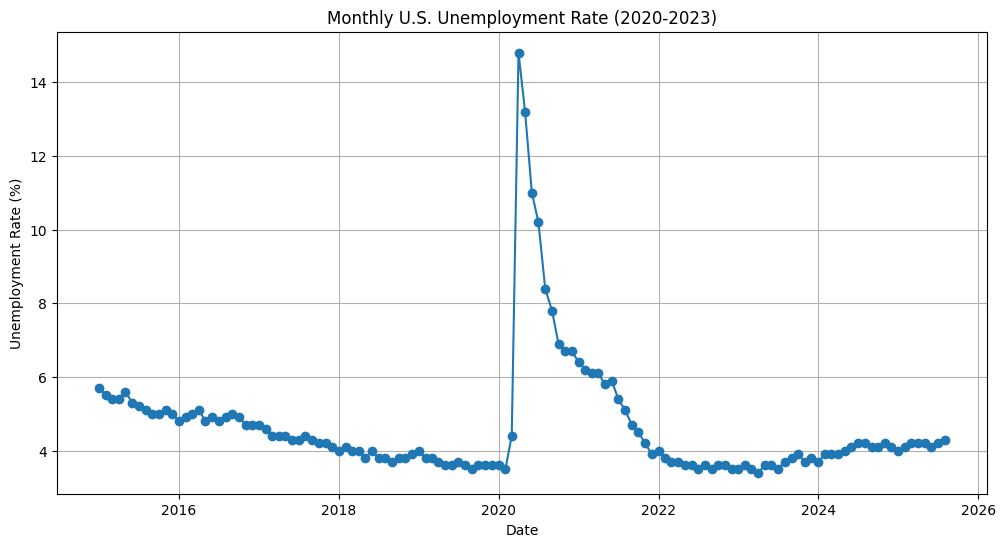

In [66]:
long_unemployment['Date'] = pd.to_datetime(
    long_unemployment['Year'].astype(str) + '-' + long_unemployment['Month'],
    format='%Y-%b'
)
long_unemployment = long_unemployment.sort_values('Date').set_index('Date').reset_index()

plt.figure(figsize=(12, 6))
plt.plot(long_unemployment['Date'], long_unemployment['Unemployment Rate'], marker='o', linestyle='-')
plt.title('Monthly U.S. Unemployment Rate (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


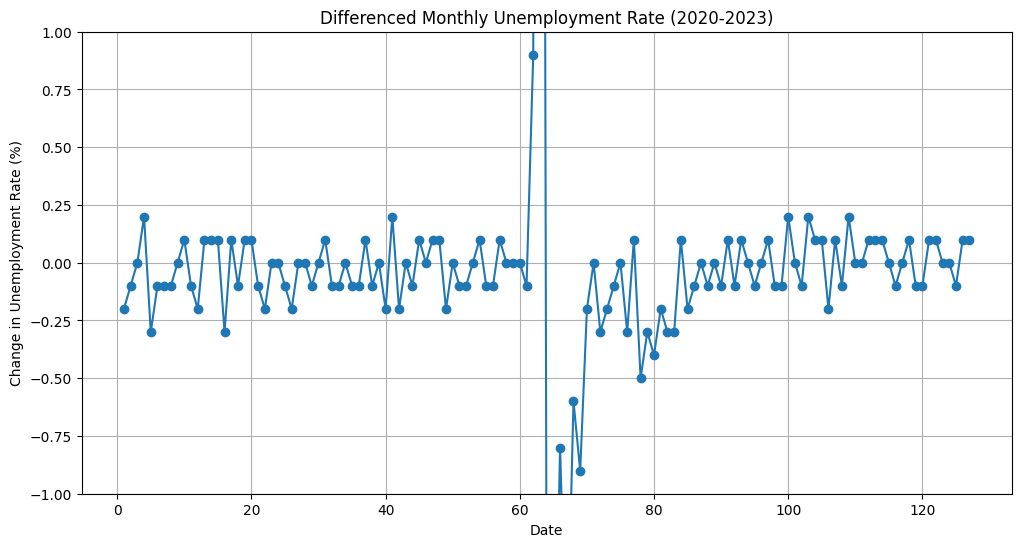

In [67]:
differenced_rates = long_unemployment['Unemployment Rate'].diff().dropna()

# 5. Plot the differenced series
plt.figure(figsize=(12, 6))
differenced_rates.plot(marker='o', linestyle='-')
plt.title('Differenced Monthly Unemployment Rate (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Change in Unemployment Rate (%)')
plt.grid(True)

plt.ylim(-1, 1)
plt.show()


### 3. Data Preparation

##### We then began some preprocessing of the data by checking for nulls and scaling our data. There were several states with years where the overdose death rate was unavailable so these rows were removed rather than being imputed. For rows that were missing Demographic data e.g. Percent_Indigenous, we decide we would impute this data with the mean of the column. We also chose to not remove any outliners since this dataset are measured values from the state and we wanted to keep as many rows as possible. Fortunately there were also no categorical variables, besides the state names column which was dropped, so no encoding was required. 

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier




In [69]:
print(f"\nMissing Values:\n{df_cleaned.isnull().sum().sort_values(ascending=False)}")
df_cleaned = df_cleaned.dropna(subset=['alldrug_rate'])
df_cleaned.head()


Missing Values:
Precent_Indigenous                  20
heroin_rate                         20
nonopioid_sedatives_rate             5
rxopioids_rate                       2
Precent_Black                        2
Precent_Asian                        1
imfs_rate                            1
Precent_Male                         0
Geographic Area Name                 0
Year                                 0
Precent_White                        0
Precent_Other                        0
Precent_25+                          0
Precent_25+_Not_HS_Grad              0
Precent_HS_Grad                      0
Precent_Female                       0
Precent_Polynesian                   0
Precent_Latino                       0
Precent_Mixed                        0
Precent_Employed                     0
Precent_Labor force (16+)            0
Precent_College_Grad                 0
Precent_Some College                 0
Precent_Employed Male                0
Precent_Employed Female              0
Precent_

,Year,Geographic Area Name,Precent_Male,Precent_Female,Precent_White,Precent_Black,Precent_Indigenous,Precent_Asian,Precent_Polynesian,Precent_Latino,...,alldrug_rate,opioids_rate,imfs_rate,heroin_rate,rxopioids_rate,nonopioid_sedatives_rate,opioids_percent,imfs_percent,heroin_percent,rxopioids_percent
1,2023,Alaska,52.000758,47.999242,57.770566,2.701090,13.392667,5.944489,1.556386,7.410258,...,48.3,40.3,37.6,4.0,6.1,6.2,83.5,77.8,8.5,12.5
2,2023,Arizona,49.616593,50.383407,52.360509,4.694761,3.916180,3.652080,0.186648,31.653370,...,40.7,28.9,26.7,0.8,3.3,3.9,70.8,65.2,2.1,8.3
5,2023,Colorado,50.498288,49.501712,64.631793,3.795825,1.185368,3.324912,0.144517,22.703789,...,28.8,22.0,19.3,0.9,3.9,4.6,76.9,67.7,3.0,13.4
6,2023,Connecticut,49.069181,50.930819,61.390530,10.656789,0.345178,4.852593,0.050114,18.747870,...,36.8,33.6,31.3,2.8,7.2,15.3,91.1,84.5,8.0,20.1
7,2023,Delaware,48.313741,51.686259,58.222660,22.196635,NaN,4.350848,0.039820,11.182775,...,53.8,48.7,46.4,3.2,5.9,3.9,90.0,85.7,6.2,11.1


In [70]:
from sklearn.impute import SimpleImputer

Column_wna = ['Precent_Polynesian', 'Precent_Black', 'Precent_Asian', 'Precent_Indigenous', 'heroin_rate', 'nonopioid_sedatives_rate', 'rxopioids_rate', 'imfs_rate']
results = []

for column in Column_wna:
    column_imp = df_cleaned[[column]]

    imputer = SimpleImputer(strategy='mean')
    imputer.fit(column_imp)

    df_cleaned[column] = imputer.transform(column_imp) 



In [71]:
print(f"\nMissing Values:\n{df_cleaned.isnull().sum().sort_values(ascending=False)}")



Missing Values:
Year                                0
Geographic Area Name                0
Precent_Male                        0
Precent_Female                      0
Precent_White                       0
Precent_Black                       0
Precent_Indigenous                  0
Precent_Asian                       0
Precent_Polynesian                  0
Precent_Latino                      0
Precent_Mixed                       0
Precent_Other                       0
Precent_25+                         0
Precent_25+_Not_HS_Grad             0
Precent_HS_Grad                     0
Precent_Some College                0
Precent_College_Grad                0
Precent_Labor force (16+)           0
Precent_Employed                    0
Precent_Employed Male               0
Precent_Employed Female             0
Precent_Unemployed                  0
Precent_Male Unemployed             0
Precent_Female Unemployed           0
Precent_Below_125%_Poverty_Level    0
alldrug_rate                     

In [72]:
df_prep = df_cleaned.drop('Geographic Area Name', axis=1)
df_prep.head()

,Year,Precent_Male,Precent_Female,Precent_White,Precent_Black,Precent_Indigenous,Precent_Asian,Precent_Polynesian,Precent_Latino,Precent_Mixed,...,alldrug_rate,opioids_rate,imfs_rate,heroin_rate,rxopioids_rate,nonopioid_sedatives_rate,opioids_percent,imfs_percent,heroin_percent,rxopioids_percent
1,2023,52.000758,47.999242,57.770566,2.701090,13.392667,5.944489,1.556386,7.410258,14.224812,...,48.3,40.3,37.6,4.0,6.1,6.2,83.5,77.8,8.5,12.5
2,2023,49.616593,50.383407,52.360509,4.694761,3.916180,3.652080,0.186648,31.653370,20.048957,...,40.7,28.9,26.7,0.8,3.3,3.9,70.8,65.2,2.1,8.3
5,2023,50.498288,49.501712,64.631793,3.795825,1.185368,3.324912,0.144517,22.703789,14.666533,...,28.8,22.0,19.3,0.9,3.9,4.6,76.9,67.7,3.0,13.4
6,2023,49.069181,50.930819,61.390530,10.656789,0.345178,4.852593,0.050114,18.747870,10.955033,...,36.8,33.6,31.3,2.8,7.2,15.3,91.1,84.5,8.0,20.1
7,2023,48.313741,51.686259,58.222660,22.196635,1.902478,4.350848,0.039820,11.182775,8.176286,...,53.8,48.7,46.4,3.2,5.9,3.9,90.0,85.7,6.2,11.1


In [73]:
#df_prep.to_csv('df_prep.csv', index=False)  

### 4. Model Testing & Predictions 

##### After running PCA, manual dimenson reduction and the ensemble classifier we did not see any inprovement in F1 over our best model (SVC). Given this we decided to use the standard scaler with the SVC model on the test dataset, being sure to replicate the exact processing steps used on the training dataset

In [74]:
X = df_prep.drop('opioids_rate', axis=1)
y = df_prep['opioids_rate']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=29)

In [79]:
def print_scores (X_train, X_test, y_train, y_test, ML_model):
    
    predictions = ML_model.predict(X_test)
    MSE = mean_squared_error(y_test, predictions)

    train = ML_model.score(X_train, y_train)
    test = ML_model.score(X_test, y_test)
    cv_scores = cross_val_score(ML_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    mean_mse = mse_scores.mean()
    std_dev_mse = mse_scores.std()

    print(f"Model: {ML_model}")
    print(f"The MSE for the model is: {MSE:.3f}") 
    print(f"Training Data R2 Score is: {train:.3f}")
    print(f"Testing Data R2 Score is: {test:.3f}")
    print(f'') 
    print("Cross-Validation MSE scores for each fold:", mse_scores)
    print(f"Average MSE across all folds: {mean_mse:.3f}")
    print(f"Standard deviation of MSE: {std_dev_mse:.3f}")

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print_scores(X_train, X_test, y_train, y_test, rf)


Model: RandomForestRegressor(random_state=42)
The MSE for the model is: 5.334
Training Data R2 Score is: 0.996
Testing Data R2 Score is: 0.980

Cross-Validation MSE scores for each fold: [ 5.82645832  1.23376107  3.12542179  5.35276993 18.16571579]
Average MSE across all folds: 6.741
Standard deviation of MSE: 5.945


In [77]:
score_variance = df_prep['opioids_rate'].var()
predictions = rf.predict(X_test)
MSE = mean_squared_error(y_test, predictions)

print(f"Variance of the 'Opioids Rate' column is {score_variance:.2f} while the mean squared error for this model was {MSE:.2f}")
print("-" * 30)

Variance of the 'Opioids Rate' column is 244.96 while the mean squared error for this model was 5.33
------------------------------


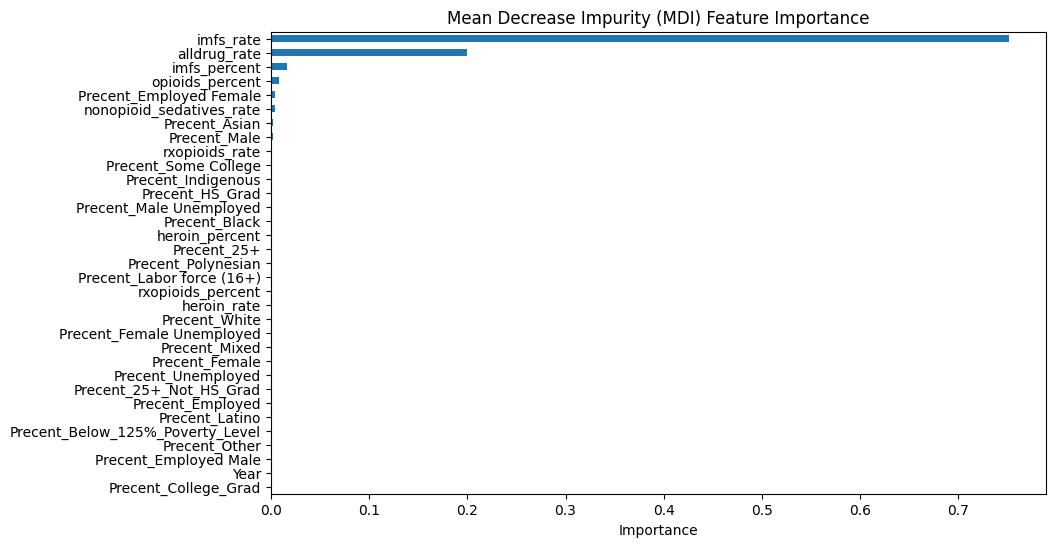

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

feature_names = X.columns

# 3. Calculate and display Mean Decrease Impurity (MDI) feature importance
mdi_importances = pd.Series(rf.feature_importances_, index=feature_names)
sorted_mdi = mdi_importances.sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
sorted_mdi.plot.barh(ax=ax)
ax.set_title("Mean Decrease Impurity (MDI) Feature Importance")
ax.set_xlabel("Importance")
plt.show()

In [82]:
import matplotlib.pyplot as plt
 
# Ensure 'State' column exists and is properly formatted

target_states = ['District of Columbia', 'West Virginia', 'Delaware', 'Tennessee', 'Kentucky']
 
# Convert date

long_unemployment['Date'] = pd.to_datetime(

    long_unemployment['Year'].astype(str) + '-' + long_unemployment['Month'],

    format='%Y-%b'

)
 
# Sort and reset index

long_unemployment = long_unemployment.sort_values('Date').reset_index(drop=True)
 
# Calculate national average

national_avg = long_unemployment.groupby('Date')['Unemployment Rate'].mean().reset_index()

national_avg['State'] = 'National Average'
 
# Filter target states

filtered_states = long_unemployment[long_unemployment['State'].isin(target_states)]
 
# Combine for plotting

plot_data = pd.concat([filtered_states, national_avg], ignore_index=True)
 
# Plot

plt.figure(figsize=(14, 7))

for state in target_states + ['National Average']:

    state_data = plot_data[plot_data['State'] == state]

    plt.plot(state_data['Date'], state_data['Unemployment Rate'], label=state)
 
plt.title('Unemployment Rate Comparison (2020–2023)')

plt.xlabel('Date')

plt.ylabel('Unemployment Rate (%)')

plt.legend(loc='upper right')

plt.grid(True)

plt.tight_layout()

plt.show()

KeyError: 'State'

In [ ]:

 
For the differenced plot:
 
# Define target states

target_states = ['District of Columbia', 'West Virginia', 'Delaware', 'Tennessee', 'Kentucky']
 
# Filter for those states

subset = long_unemployment[long_unemployment['State'].isin(target_states)]
 
# Convert to datetime and sort

subset['Date'] = pd.to_datetime(subset['Year'].astype(str) + '-' + subset['Month'], format='%Y-%b')

subset = subset.sort_values(['State', 'Date'])
 
# Plot differenced unemployment rate for each state

plt.figure(figsize=(14, 7))

for state in target_states:

    state_data = subset[subset['State'] == state].set_index('Date')

    differenced = state_data['Unemployment Rate'].diff().dropna()

    plt.plot(differenced.index, differenced, label=state)
 
plt.title('Differenced Monthly Unemployment Rate (2020–2023) – Selected States')

plt.xlabel('Date')

plt.ylabel('Change in Unemployment Rate (%)')

plt.ylim(-1, 1)

plt.legend(loc='upper right')

plt.grid(True)

plt.tight_layout()

plt.show()
 

SyntaxError: invalid syntax (1922939157.py, line 59)

### 5. Conclusion

After running the random forest regressor model to our data we see that we are able to predict overdose death rates with a 98% accuracy. We also ran a feature importance to analysis which variable was most predictive for the model and it was imfs_rate. This was unsuprisiingly as this column represents the percent of drug overdose deaths involving illegally-made fentanyls. This models demonstrate the devasting impact fentanyl has had in contributing to overdoses. While this wanst praticurly unexpected, it was shocking to note expecially as it was previously assumed that states with high populations below the poverty level, undereducation, or unemployment especially male unemploymnet were bigger drivers of the problem.
